<a href="https://colab.research.google.com/github/mrinalinimurugan/Tensorflow-with-Keras/blob/main/03_Intro_to_ComputerVision_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Intro to CNN and CV with Tf

#Get the data
#Food101 dataset
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the douwnloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-24 06:41:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 64.233.184.128, 64.233.167.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  26.5MB/s    in 3.9s    

2021-08-24 06:41:34 (26.5 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
#Inspect the data

!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak


1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

#Walk through pizza_steak directories and list no of files

for dirpath,dirnames,filesnames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filesnames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
#The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Aug 24 06:41 .
drwxr-xr-x 1 root root 4096 Aug 24 06:41 ..
-rw-r--r-- 1 root root 6148 Aug 24 06:41 .DS_Store
drwxr-xr-x 4 root root 4096 Aug 24 06:41 test
drwxr-xr-x 4 root root 4096 Aug 24 06:41 train


In [7]:
#Aother way to find out how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [8]:
num_steak_images_train

750

In [9]:
#Visualize the images

#Get the class names programaticaaly
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names=class_names[1:] #remove .DS_Store
print(class_names)

['pizza' 'steak']


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #Set up target directory
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder +"/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:{img.shape}")

  return img

Image shape:(382, 512, 3)


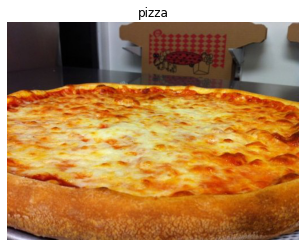

In [11]:
#View a random image from train dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [12]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
array([[[ 54,  43,  49],
        [ 56,  45,  51],
        [ 57,  46,  52],
        ...,
        [201, 190, 188],
        [195, 185, 184],
        [192, 182, 181]],

       [[ 55,  44,  50],
        [ 56,  45,  51],
        [ 58,  47,  53],
        ...,
        [163, 150, 144],
        [157, 143, 140],
        [151, 137, 134]],

       [[ 55,  44,  50],
        [ 57,  46,  52],
        [ 58,  47,  53],
        ...,
        [126, 108,  98],
        [121, 102,  95],
        [115,  98,  90]],

       ...,

       [[101,  93, 106],
        [104,  96, 109],
        [114, 106, 119],
        ...,
        [160, 159, 175],
        [151, 150, 166],
        [140, 142, 157]],

       [[ 88,  80,  95],
        [ 90,  82,  97],
        [ 98,  90, 105],
        ...,
        [153, 156, 173],
        [147, 150, 167],
        [139, 142, 159]],

       [[ 86,  77,  94],
        [ 88,  79,  96],
        [ 92,  84,  99],
        ...,
        [149, 154, 17

In [13]:
#View the image shape
img.shape

(382, 512, 3)

In [14]:
#Get all the values scaled
img/255.

array([[[0.21176471, 0.16862745, 0.19215686],
        [0.21960784, 0.17647059, 0.2       ],
        [0.22352941, 0.18039216, 0.20392157],
        ...,
        [0.78823529, 0.74509804, 0.7372549 ],
        [0.76470588, 0.7254902 , 0.72156863],
        [0.75294118, 0.71372549, 0.70980392]],

       [[0.21568627, 0.17254902, 0.19607843],
        [0.21960784, 0.17647059, 0.2       ],
        [0.22745098, 0.18431373, 0.20784314],
        ...,
        [0.63921569, 0.58823529, 0.56470588],
        [0.61568627, 0.56078431, 0.54901961],
        [0.59215686, 0.5372549 , 0.5254902 ]],

       [[0.21568627, 0.17254902, 0.19607843],
        [0.22352941, 0.18039216, 0.20392157],
        [0.22745098, 0.18431373, 0.20784314],
        ...,
        [0.49411765, 0.42352941, 0.38431373],
        [0.4745098 , 0.4       , 0.37254902],
        [0.45098039, 0.38431373, 0.35294118]],

       ...,

       [[0.39607843, 0.36470588, 0.41568627],
        [0.40784314, 0.37647059, 0.42745098],
        [0.44705882, 0

In [15]:
#An end to end example

#Bulding of a CNN

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
#Preprocess data
train_datagen = ImageDataGenerator(rescale= 1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup path
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#import data and turn to batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42)
valid_data =valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#Build a CNN model

model_1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10,
                                                            kernel_size=3,
                                                            activation="relu",
                                                            input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.Conv2D(10,2,activation="relu"),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1= model_1.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data = valid_data,
                     validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 255ms/step - loss: 0.5596 - accuracy: 0.7147 - val_loss: 0.4037 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4181 - accuracy: 0.8107 - val_loss: 0.3254 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 10s 224ms/step - loss: 0.3778 - accuracy: 0.8393 - val_loss: 0.3079 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3331 - accuracy: 0.8533 - val_loss: 0.3145 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3062 - accuracy: 0.8700 - val_loss: 0.3222 - val_accuracy: 0.8780


In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 107, 107, 10)      410       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [17]:
#Using the same model as before

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1,activation="sigmoid"),
])

model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_2=model_2.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 1.2143 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [19]:
#20x paameters than our CNN
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100,activation="relu"),
                               tf.keras.layers.Dense(100,activation="relu"),
                               tf.keras.layers.Dense(100,activation="relu"),
                               tf.keras.layers.Dense(1,activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_3=model_3.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 4.3216 - accuracy: 0.5973 - val_loss: 0.7801 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.7525 - accuracy: 0.7067 - val_loss: 0.4578 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.5563 - accuracy: 0.7507 - val_loss: 0.4872 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4920 - accuracy: 0.7787 - val_loss: 0.4734 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4310 - accuracy: 0.8107 - val_loss: 1.0360 - val_accuracy: 0.6080


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape:(512, 512, 3)
Image shape:(384, 512, 3)


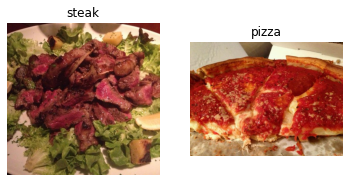

In [21]:
#Binary classification

#Visualize the data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

In [22]:
#Preprocess the data

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [23]:
!nvidia-smi

Tue Aug 24 06:46:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    56W / 149W |   1789MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
#Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [25]:
#Load in our image data from directories and turn to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
#Get the sample of a train data batch
images,labels = train_data.next()
len(images),len(labels)

(32, 32)

In [27]:
len(train_data)

47

In [28]:
#Get the first 2 images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [29]:
images[7].shape

(224, 224, 3)

In [30]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [31]:
#Create a CNN model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
                      Conv2D(filters=10,
                             kernel_size=(3,3),
                             strides=(1,1),
                             padding="valid",
                             activation="relu",
                             input_shape=(224,224,3)),
                      Conv2D(10,3,activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      Flatten(),
                      Dense(1,activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])

history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 12s 243ms/step - loss: 0.7716 - accuracy: 0.7160 - val_loss: 0.5041 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4680 - accuracy: 0.7960 - val_loss: 0.4465 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3489 - accuracy: 0.8573 - val_loss: 0.4110 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 11s 229ms/step - loss: 0.1859 - accuracy: 0.9407 - val_loss: 0.4615 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.0600 - accuracy: 0.9873 - val_loss: 0.5216 - val_accuracy: 0.8160


In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 159ms/step - loss: 0.3222 - accuracy: 0.8780


[0.3221917748451233, 0.878000020980835]

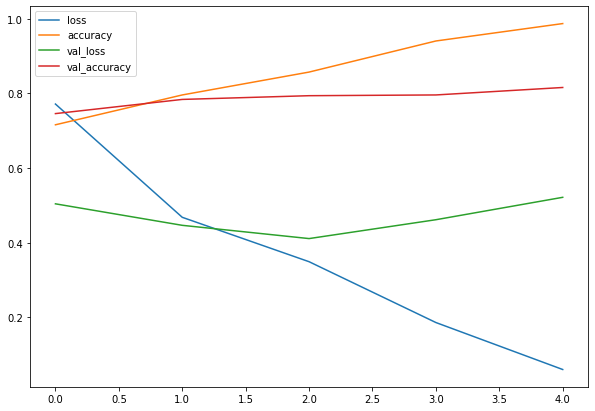

In [34]:
#Evaluating our model

import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [35]:
#Plot the validation and training curves separately

def plot_loss_curve(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss,label = "training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label = "training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


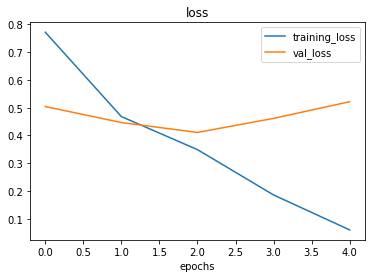

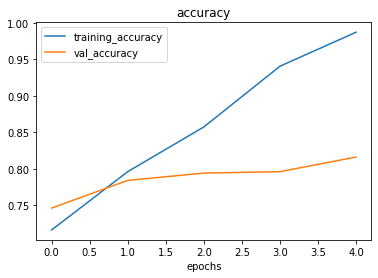

In [36]:
#Check out loss and accuracy of model 4
plot_loss_curve(history_4)

In [37]:
#Adjust the model parameters

model_5 = Sequential([
                      Conv2D(10,3,
                             activation="relu",
                             input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1,activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 0.6243 - accuracy: 0.6560 - val_loss: 0.4569 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4679 - accuracy: 0.7800 - val_loss: 0.3775 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4243 - accuracy: 0.8167 - val_loss: 0.3739 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4063 - accuracy: 0.8233 - val_loss: 0.3537 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3723 - accuracy: 0.8373 - val_loss: 0.3264 - val_accuracy: 0.8760


In [38]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

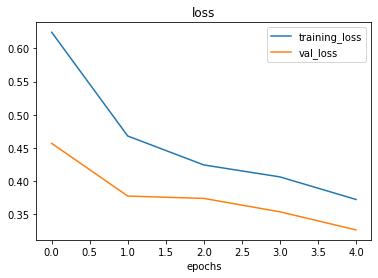

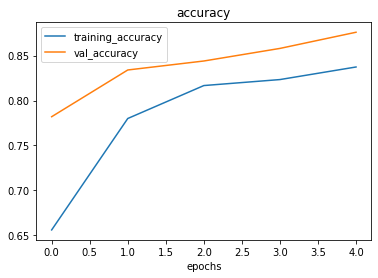

In [39]:
plot_loss_curve(history_5)

In [40]:
#Finding data augmentation

#Create ImageDataGenerator training instances with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2, #cut or slice
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
IMG_SIZE=(224,224)
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [41]:
#Get sample data batches

images,labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


In [42]:
model_6 = Sequential([
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 535ms/step - loss: 0.7083 - accuracy: 0.4933 - val_loss: 0.6887 - val_accuracy: 0.5600
Epoch 2/5
47/47 [==============================] - 25s 523ms/step - loss: 0.7015 - accuracy: 0.5040 - val_loss: 0.6812 - val_accuracy: 0.7220
Epoch 3/5
47/47 [==============================] - 25s 523ms/step - loss: 0.6870 - accuracy: 0.6080 - val_loss: 0.6719 - val_accuracy: 0.6740
Epoch 4/5
47/47 [==============================] - 24s 522ms/step - loss: 0.6764 - accuracy: 0.6287 - val_loss: 0.6194 - val_accuracy: 0.7040
Epoch 5/5
47/47 [==============================] - 24s 516ms/step - loss: 0.6980 - accuracy: 0.6480 - val_loss: 0.6011 - val_accuracy: 0.7440


Showing image number: 13 


(-0.5, 223.5, 223.5, -0.5)

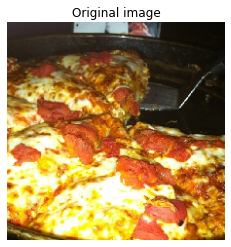

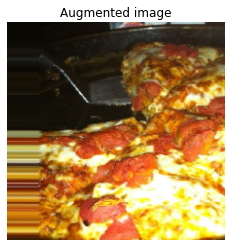

In [43]:
import random
random_number = random.randint(0,32)
print(f"Showing image number: {random_number} ")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

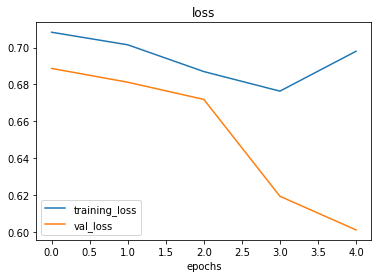

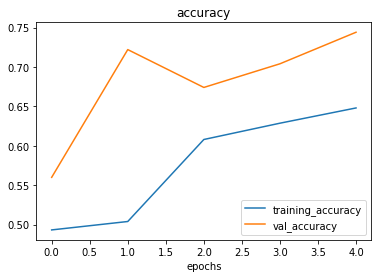

In [44]:
plot_loss_curve(history_6)

In [45]:
#Lets shuffle our training dta and augmented training data

train_data_augmented_1 = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

model_7 = Sequential([
                      Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_1,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_1),
            validation_data=test_data,
            validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 534ms/step - loss: 0.6353 - accuracy: 0.6387 - val_loss: 0.5279 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 25s 527ms/step - loss: 0.5169 - accuracy: 0.7500 - val_loss: 0.3718 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 24s 517ms/step - loss: 0.4866 - accuracy: 0.7680 - val_loss: 0.4288 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 25s 524ms/step - loss: 0.4737 - accuracy: 0.7820 - val_loss: 0.4043 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 24s 520ms/step - loss: 0.4963 - accuracy: 0.7520 - val_loss: 0.4353 - val_accuracy: 0.7940


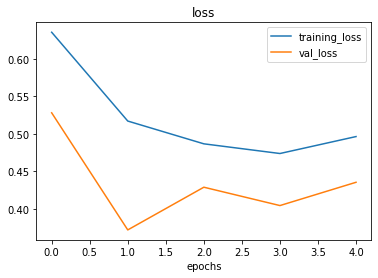

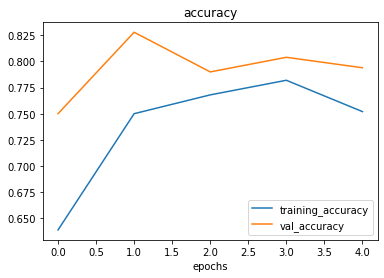

In [46]:
plot_loss_curve(history_7)

In [47]:
#Making a prediction with our trained model on our own custom model
print(class_names)

['pizza' 'steak']


--2021-08-24 06:56:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2021-08-24 06:56:34 (67.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

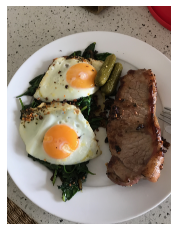

In [48]:
#View our example image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [49]:
#Check the shape of our image
steak.shape

(4032, 3024, 3)

In [50]:
#To import an image and resize it

def load_and_prep_image(filename,img_shape=224):
  img = tf.io.read_file(filename)

  #Decode file
  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size=[img_shape,img_shape])
  #Rescale the image and get all values bw 0 and 1
  img=img/255.
  return img

In [51]:
steak = load_and_prep_image("03-steak.jpeg")

In [52]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))

In [53]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [54]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [55]:
def pred_and_plot(model,filename,class_names=class_names):
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)



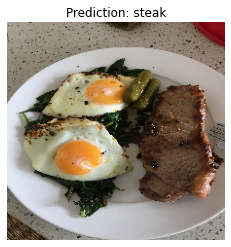

In [56]:
pred_and_plot(model_7,"03-steak.jpeg")

In [57]:
#Download another image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2021-08-24 06:56:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2021-08-24 06:56:49 (84.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



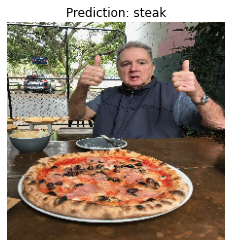

In [58]:
pred_and_plot(model_7,"03-pizza-dad.jpeg")

In [59]:
#Multi-class image classification

#Multi-class image classification

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()


--2021-08-24 06:56:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.128, 173.194.76.128, 66.102.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  56.8MB/s    in 10s     

2021-08-24 06:57:01 (49.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [60]:


import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

In [61]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [62]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape:(382, 512, 3)


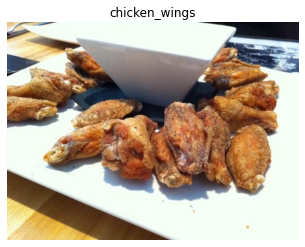

In [63]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [64]:
random.choice(class_names)

'ramen'

In [94]:
#Preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [66]:
#Create a CNN model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation

model_8 = Sequential([
                      Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10,activation="softmax")
])

model_8.compile(loss="categorical_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])

history_8 = model_8.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 56s 236ms/step - loss: 2.2034 - accuracy: 0.1695 - val_loss: 2.1086 - val_accuracy: 0.2196
Epoch 2/5
235/235 [==============================] - 54s 228ms/step - loss: 1.9688 - accuracy: 0.3056 - val_loss: 1.8920 - val_accuracy: 0.3432
Epoch 3/5
235/235 [==============================] - 54s 231ms/step - loss: 1.6765 - accuracy: 0.4273 - val_loss: 1.9410 - val_accuracy: 0.3244
Epoch 4/5
235/235 [==============================] - 53s 228ms/step - loss: 1.1640 - accuracy: 0.6199 - val_loss: 2.2426 - val_accuracy: 0.2992
Epoch 5/5
235/235 [==============================] - 54s 229ms/step - loss: 0.5616 - accuracy: 0.8227 - val_loss: 3.0954 - val_accuracy: 0.2872


In [67]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 3.0954 - accuracy: 0.2872


[3.095407247543335, 0.287200003862381]

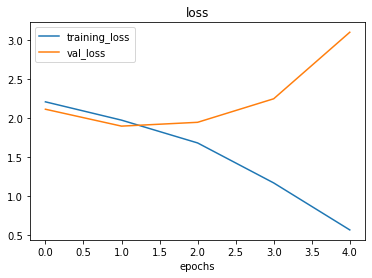

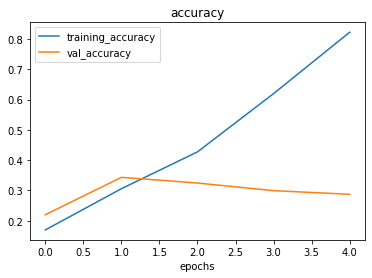

In [68]:
#Loss curves
plot_loss_curve(history_8)

In [69]:
#Adjust the model hyperparameters to beat the baseline/reduce overfitting
model_8.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

In [77]:
model_9 = Sequential([
                      Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                      Conv2D(10,3,activation="relu")
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10,activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])

history_9 = model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

SyntaxError: ignored

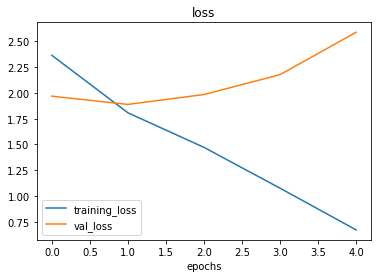

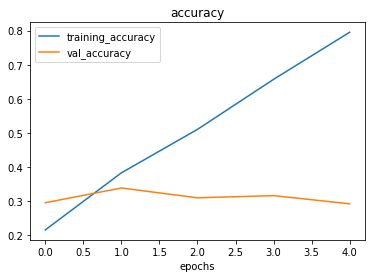

In [78]:
plot_loss_curve(history_9)

In [79]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [84]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=20,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(244,244),
                                                                   batch_size=32,
                                                                   class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [85]:
model_10 = tf.keras.models.clone_model(model_9)

model_10.compile(loss="categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])



In [86]:
model_10.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [93]:
test_data[7]

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [90]:
test_data.image_shape

(224, 224, 3)

In [ ]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [98]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 2.3202 - accuracy: 0.0956


[2.320197582244873, 0.09560000151395798]

In [ ]:
plot_loss_curve(history_10)

In [100]:
#Making prediction with our trained model
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [101]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2021-08-24 07:49:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.03s   

2021-08-24 07:49:57 (104 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2021-08-24 07:49:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting 

In [108]:
def pred_and_plot(model,filename,class_names=class_names):
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))
  print(len(pred[0]))
  print(tf.argmax(pred[0]))
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

10
tf.Tensor(8, shape=(), dtype=int64)


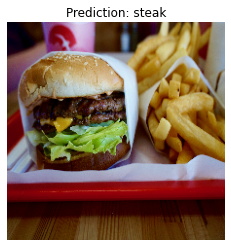

In [109]:
#Make a prediction using model 10
pred_and_plot(model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

10
tf.Tensor(3, shape=(), dtype=int64)


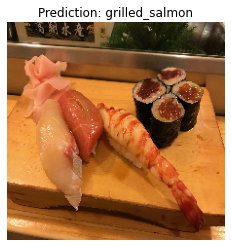

In [110]:
pred_and_plot(model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

10
tf.Tensor(1, shape=(), dtype=int64)


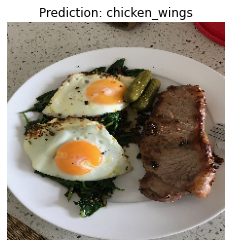

In [111]:
pred_and_plot(model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

In [112]:
#Saving and loading our model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [115]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 2.3202 - accuracy: 0.0956


[2.320197820663452, 0.09560000151395798]

In [116]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 2.3202 - accuracy: 0.0956


[2.320197105407715, 0.09560000151395798]